In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv("/home/sid/Downloads/iris-species/Iris.csv")

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
## Since first column is of no use.
data=data.iloc[:,1:]

In [5]:
data.shape

(150, 5)

In [6]:
data.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [7]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
## Hence we can also see from above that there are no missing values.

In [9]:
data.skew()

SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
dtype: float64

Text(0,0.5,u'Count')

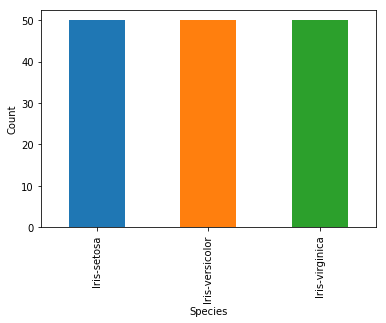

In [10]:
plt.figure()
pd.Series(data['Species']).value_counts().plot(kind = 'bar')
plt.xlabel("Species")
plt.ylabel("Count")

In [11]:
## Balanced-Dataset.

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le=LabelEncoder()

In [14]:
data["Species"]=le.fit_transform(data["Species"])

In [15]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


In [16]:
## Therefore correlation is high for PetalLength and PetalWidth with respect to the target variable Species.

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
model=LogisticRegression(C=1e5)

In [19]:
X=[x for x in data.columns if x not in ["Species"]]

In [20]:
model.fit(data[X],data["Species"])

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [21]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(data["Species"],model.predict(data[X]))

In [22]:
print accuracy

0.98


In [23]:
## Logistic Regresssion  model implemented has 98% accuracy on the training set.

In [24]:
##Plotting the Decision Boundary for this by only plotting the features- Petallength and PetalWidth(highest corr)

In [25]:

model.fit(data[["PetalLengthCm","PetalWidthCm"]],data["Species"])


LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [26]:
step_size=.02

In [27]:
a_min, a_max = data["PetalLengthCm"].min() - .5, data["PetalLengthCm"].max() + .5
b_min, b_max = data["PetalWidthCm"].min() - .5, data["PetalWidthCm"].max() + .5

In [28]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [29]:
import numpy as np
xx, yy = np.meshgrid(np.arange(a_min, a_max, step_size), np.arange(b_min, b_max, step_size))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])


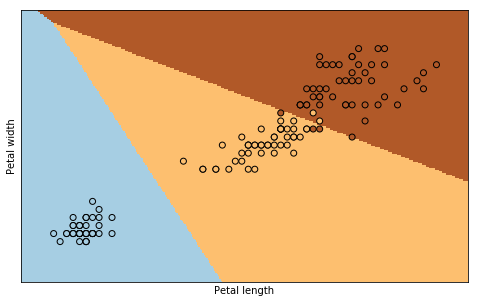

In [30]:
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
# Training Points
plt.scatter(data["PetalLengthCm"], data["PetalWidthCm"], c=data["Species"], edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()